In [1]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [3]:
TenYearCHD_df = pd.read_csv('HeartDisease.csv',sep=";" )
TenYearCHD_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
TenYearCHD_df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [5]:
TenYearCHD_df = TenYearCHD_df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose','TenYearCHD']]
TenYearCHD_df['TenYearCHD'] = TenYearCHD_df['TenYearCHD'].astype('int')
TenYearCHD_df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
print(TenYearCHD_df.isnull().sum())

age             0
cigsPerDay     29
totChol        50
sysBP           0
diaBP           0
BMI            19
heartRate       1
glucose       388
TenYearCHD      0
dtype: int64


In [7]:
TenYearCHD_df[['cigsPerDay', 'totChol','BMI','heartRate','glucose']]=TenYearCHD_df[['cigsPerDay', 'totChol','BMI','heartRate','glucose']].fillna('0')
TenYearCHD_df
print(TenYearCHD_df.isnull().sum())

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
TenYearCHD    0
dtype: int64


In [8]:
X = np.asarray(TenYearCHD_df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']])
X[0:5] #print the first 5 values

array([[39, 0.0, 195.0, 106.0, 70.0, 26.97, 80.0, 77.0],
       [46, 0.0, 250.0, 121.0, 81.0, 28.73, 95.0, 76.0],
       [48, 20.0, 245.0, 127.5, 80.0, 25.34, 75.0, 70.0],
       [61, 30.0, 225.0, 150.0, 95.0, 28.58, 65.0, 103.0],
       [46, 23.0, 285.0, 130.0, 84.0, 23.1, 85.0, 85.0]], dtype=object)

In [9]:
y = np.asarray(TenYearCHD_df['TenYearCHD'])
y[0:5] #print the first 5 values

array([0, 0, 0, 1, 0])

In [10]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.23495068, -0.75132224, -0.76087026, -1.19590711, -1.08262515,
         0.29039572,  0.34262779,  0.07720798],
       [-0.41825733, -0.75132224,  0.31411609, -0.51518725, -0.15898843,
         0.68854851,  1.58433854,  0.0467814 ],
       [-0.18491638,  0.92920959,  0.21639006, -0.22020864, -0.24295541,
        -0.07834806, -0.0712758 , -0.13577807],
       [ 1.33179984,  1.76947551, -0.17451407,  0.80087114,  1.0165492 ,
         0.65461504, -0.89908297,  0.86829905],
       [-0.41825733,  1.18128937,  0.99819832, -0.10675533,  0.09291249,
        -0.58508798,  0.75653137,  0.32062062]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.4,random_state=42)

In [12]:
LR = LogisticRegression().fit(X_train,y_train)

In [13]:
yhat = LR.predict(X_test)

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.70418724, 0.29581276],
       [0.92763165, 0.07236835],
       [0.87517513, 0.12482487],
       [0.84501612, 0.15498388],
       [0.91737911, 0.08262089],
       [0.82870394, 0.17129606],
       [0.88880436, 0.11119564],
       [0.76205467, 0.23794533],
       [0.84168338, 0.15831662],
       [0.63444592, 0.36555408]])

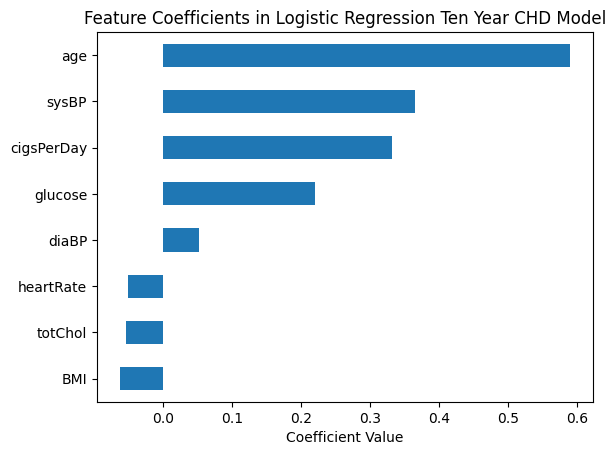

In [15]:
coefficients = pd.Series(LR.coef_[0], index=TenYearCHD_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Ten Year CHD Model")
plt.xlabel("Coefficient Value")
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_test, yhat, labels=[1,2])

array([[21,  0],
       [ 0,  0]], dtype=int64)

In [17]:
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, yhat):.3f}")

Logistic Regression Testing Accuracy: 0.858


In [18]:
print("\nLogistic Regression Test Classification Report:")
print(classification_report(y_test, yhat))


Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1445
           1       0.68      0.08      0.15       251

    accuracy                           0.86      1696
   macro avg       0.77      0.54      0.54      1696
weighted avg       0.83      0.86      0.81      1696



In [19]:
log_loss(y_test, yhat_prob)

0.383758754456315